In [5]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
from statsmodels.sandbox.stats.multicomp import multipletests

%matplotlib inline

## Задача 1

$R_{ij}$ - ранг $X_{ij}$ в $(X_{i1}, ..., X_{ik})$ <br>
$L = \sum_{j=1}^k \sum_{i=1}^n R_{ij}$ - статистика Пейджа <br>
$\overline \rho_s = \frac{1}{n} \sum_{i=1}^n \rho_s$, где $\rho_s$ - коэффициент корреляции Спирмена для выборок $R_{ij}$ и $(1, 2,...,k)$ <br>

<br>
Распишем : <br>
$$\overline \rho_s = \frac{1}{n} \sum_{i=1}^n \rho_s = \frac{1}{n} \sum_{i=1}^n (1 - \frac{6}{k^3 - k}\sum_{j=1}^k (R_{ij} - j)^2) = $$
$$1 - \frac{6}{n(k^3 - k)} \sum_{i=1}^n \sum_{j=1}^k {R_{ij}}^2 - 2jR_{ij} + j^2 = 1 -  \frac{6}{n(k^3 - k)} \sum_{i=1}^n \sum_{j=1}^k ({R_{ij}}^2 + j^2) + \frac{6}{n(k^3 - k)} \sum_{i=1}^n \sum_{j=1}^k 2jR_{ij}$$
Теперь заметим, что множества $R_{ij}$ и (1, ..., k) совпадают, поэтому и $R_{ij}^2$ и $(1, ..., k^2)$ совпадают. Отсюда получим, что $\sum_{j=1}^k {R_{ij}}^2 = \sum_{j=1}^k j^2$ <br>
То есть <br>
$$\overline \rho_s = 1 - \frac{6}{n(k^3 - k)} \sum_{i=1}^n \sum_{j=1}^k 2j^2 + \frac{6}{n(k^3 - k)} \sum_{i=1}^n \sum_{j=1}^k 2jR_{ij} = 1 + \frac{12}{nk(k^2 - 1)} \sum_{j=1}^k jR_{ij} - \frac{6}{k(k^2 - 1)}\frac{k(k+1)(2k+1)}{3}  = 1 + \frac{12 L}{nk(k^2 - 1)} - \frac{2(2k+1)}{k-1} = \frac{12 L}{nk(k^2 - 1)} - \frac{3(k+1)}{k-1}$$

## Задача 2

Мы имеем модель $X_{ij} = \mu + \alpha_i + \beta_j + \epsilon_{ij}$ <br>


Предлагается следующий алгоритм: <br>
Сначала из каждого элемента вычтем общее среднее, тем самым мы уберем $\mu$ <br>
Потом для каждой строки вычтем стреднее по этой строке. То есть из каждого элемента $X_{ij}$ вычтем $\overline X_i$. Тем самым мы уберем влияния i-ого объекта, то есть $\alpha_i$ <br>
После из каждого столбца вычтем среднее по этому столбцу.  То есть из каждого элемента $X_{ij}$ вычтем $\overline X_j$. Тем самым мы уберем влияния j-ого фактора, то есть $\beta_i$ <br>
После этого остануться только погрешности и искомые нами ошибки $\epsilon_{ij}$ <br>
Полученные значения проверим на нормальность обычным способом, например, применим критерий Шапиро-Уилка.

## Задача 3

Считываем данные

In [272]:
data = []
with open('hw7t3.txt', 'r') as file:
    raw_data = file.read().split('\n')
    for line in raw_data:
        line = line.split("'")
        l = [line[1], line[3], int(re.findall("\d+" , line[4].strip(','))[0])]
        data.append(l)

data = np.array(data)

Посмотрим какие бывают лекарста

In [273]:
np.unique(data[:,1])

array(['Analgine', 'Codeine', 'Iodomarine', 'Irunine', 'Mildronate',
       'Permetrine'], dtype='<U13')

Разобъем эксперименты по лекарствам

In [274]:
X1 = data[:,[0,2]][data[:,1] == 'Analgine']
X2 = data[:,[0,2]][data[:,1] == 'Codeine']
X3 = data[:,[0,2]][data[:,1] == 'Iodomarine']
X4 = data[:,[0,2]][data[:,1] == 'Irunine']
X5 = data[:,[0,2]][data[:,1] == 'Mildronate']
X6 = data[:,[0,2]][data[:,1] == 'Permetrine']

Заметим, что мы имеем дело с зависимыми выборками, так как в экспериментах принимают участие одни и те же люди и при этом мы ничего не знаем про распределение случайной ошибки. Но также можно заметить, что выборки по лекарствам и людям имеют разный размер, а таких критериев мы не проходили. Поэтому будем рассматривать Mr. Fattakhov и Gospodin Tsay отдельно

In [275]:
X11 = list(map(int, X1[X1[:,0] == 'Mr. Fattakhov'][:,1]))
X12 = list(map(int, X1[X1[:,0] == 'Gospodin Tsay'][:,1]))
X21 = list(map(int, X2[X2[:,0] == 'Mr. Fattakhov'][:,1]))
X22 = list(map(int, X2[X2[:,0] == 'Gospodin Tsay'][:,1]))
X31 = list(map(int, X3[X3[:,0] == 'Mr. Fattakhov'][:,1]))
X32 = list(map(int, X3[X3[:,0] == 'Gospodin Tsay'][:,1]))
X41 = list(map(int, X4[X4[:,0] == 'Mr. Fattakhov'][:,1]))
X42 = list(map(int, X4[X4[:,0] == 'Gospodin Tsay'][:,1]))
X51 = list(map(int, X5[X5[:,0] == 'Mr. Fattakhov'][:,1]))
X52 = list(map(int, X5[X5[:,0] == 'Gospodin Tsay'][:,1]))
X61 = list(map(int, X6[X6[:,0] == 'Mr. Fattakhov'][:,1]))
X62 = list(map(int, X6[X6[:,0] == 'Gospodin Tsay'][:,1]))

In [281]:
X11, X21, X31, X41, X51, X61

([28, 35, 31, 29, 38, 23, 20, 39, 19, 30, 9, 27, 23, 17, 11, 15],
 [13, 16, 10, 15, 16, 13, 14, 14, 10, 15, 21, 12, 12, 13, 22],
 [19, 20, 16, 6, 15, 28, 24, 16, 20, 18, 12, 14, 32],
 [18, 20, 19, 29, 27, 13, 21, 16, 11, 17],
 [0, 28, 24, 32, 30, 28, 26, 14, 21, 28, 41, 29],
 [18, 26, 23, 19, 9, 23, 25, 23, 35, 30, 5, 26, 37, 29])

**Для мистера Фаттахова**

Сначала посмотрим на boxplot

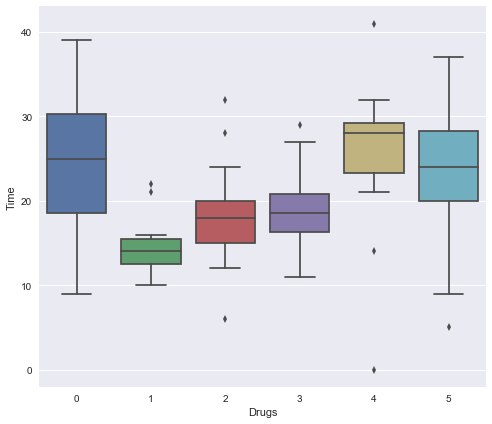

In [276]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=[X11, X21, X31, X41, X51, X61])
plt.xlabel('Drugs')
plt.ylabel('Time')
plt.show()

Визуально действие лекарств различается

Проверим выборки на нормальность

In [277]:
sps.shapiro(X11), sps.shapiro(X21), sps.shapiro(X31), sps.shapiro(X41), sps.shapiro(X51), sps.shapiro(X61)

((0.9717442393302917, 0.8660113215446472),
 (0.8887045979499817, 0.06410329788923264),
 (0.9696120619773865, 0.8896085619926453),
 (0.9521920084953308, 0.6944722533226013),
 (0.873929500579834, 0.07331383228302002),
 (0.9448846578598022, 0.48444247245788574))

In [278]:
multipletests([sps.shapiro(X11)[1], sps.shapiro(X21)[1], sps.shapiro(X31)[1], sps.shapiro(X41)[1], sps.shapiro(X51)[1], sps.shapiro(X61)[1]], alpha=0.05, method='holm')

(array([False, False, False, False, False, False]),
 array([1.        , 0.38461979, 1.        , 1.        , 0.38461979,
        1.        ]),
 0.008512444610847103,
 0.008333333333333333)

Как видим, ни в одном из случаев гипотеза не отвергается. Проверим выборки на равентсво дисперсий

In [279]:
sps.bartlett(*[X11, X21, X31, X41, X51, X61])

BartlettResult(statistic=16.292372275672335, pvalue=0.006057068762069103)

Гипотеза о равенстве дисперсий отвергается, поэтому применять критерий Фишера не можем.
Применим критерий Краскела-Уоллиса

In [284]:
sps.kruskal(X11, X21, X31, X41, X51, X61)

KruskalResult(statistic=21.085954401803896, pvalue=0.0007803212325396148)

Как видим, гипотеза об одинаковости эффекта разных лекарств на Фаттахова отвергается. Теперь поймем какое из лекарств ему помогает лучше. Для этого для каждой пары лекарств применим критерий Шеффе

In [270]:
def sheffe(c, samples):
    ns = np.array(list(map(lambda x: len(x), samples)))
    k = len(samples)
    n = np.array(ns).sum()
    sin = 1./(n - k)*(ns* np.array(list(map(lambda x: np.array(x).var(), samples)))).sum()
    S = (c * np.array(list(map(lambda x: np.array(x).mean(), samples)))).sum()**2/((k - 1) * sin * (c**2/ns).sum())
    return S

In [271]:
ssamples = np.array([X11, X21, X31, X41, X51, X61])
k = 6
N = len(X11) + len(X21) + len(X31) + len(X41) + len(X51) + len(X61)
pvalues = []
for i in range(5):
    for j in range(i+1, 6):
        c = np.zeros(6)
        c[i] = 1
        c[j] = -1
        S = sheffe(c, ssamples)
        pvalue = sps.f.sf(S, k-1, N-k)
        pvalues.append(pvalue)
        print("sheffe for {} and {} : statistic : {}, pvalue : {}".format(i+1, j+1, S, pvalue))
        
print('Плотность Фишера в точке 0.95 ', sps.f.ppf(0.95, k-1, N-k))

sheffe for 1 and 2 : statistic : 2.7363988528710945, pvalue : 0.025295245127498513
sheffe for 1 and 3 : statistic : 0.9211236562154548, pvalue : 0.47224179253190457
sheffe for 1 and 4 : statistic : 0.6350595010737174, pvalue : 0.6735842106630963
sheffe for 1 and 5 : statistic : 0.004869779562589165, pvalue : 0.9999948756496561
sheffe for 1 and 6 : statistic : 0.036132959432170125, pvalue : 0.9992757996568074
sheffe for 2 and 3 : statistic : 0.3883836500378821, pvalue : 0.8552885249474018
sheffe for 2 and 4 : statistic : 0.4480744544706446, pvalue : 0.8133763376210654
sheffe for 2 and 5 : statistic : 2.572323099209083, pvalue : 0.03352361638056368
sheffe for 2 and 6 : statistic : 1.9955498988963933, pvalue : 0.08916037053090012
sheffe for 3 and 4 : statistic : 0.007789116775369381, pvalue : 0.9999835118285026
sheffe for 3 and 5 : statistic : 0.9249947215676072, pvalue : 0.46978349682623766
sheffe for 3 and 6 : statistic : 0.5622182347984583, pvalue : 0.7285838390778894
sheffe for 4 and 

Получили, что отвергается только одна гипотеза о равенстве эффектов, но нужно загонать все это в множественную проверку гипотез

Посмотрим на полученные статистики и pvalue. Видим, что мы получали самую большую статистику в парах со вторым лекарством (более того в случае с парой первое и второе лекарство это статистически значимо, а в случае с 5 и 2 и 6 и 2 это почти статистически значимо). Этим лекарством является Codeine. Более того, если мы еще раз посмотрим на boxplot, то увидим, что у второго лекарства матожидание времени намного меньше, чем у остальных. Отсюда делаем вывод, что Фаттахову больше подходит Codeine. <br>
То есть если под вопросом в задании "Так ли то, что мистеру Фаттахову лучше всего помогает плацебо" подразумевается то, что на него одинаково воздействуют лекарства, то можно сказать, что это не так и ему помогает лучше Codeine.

**для господина Цай**

Визуализируем данные

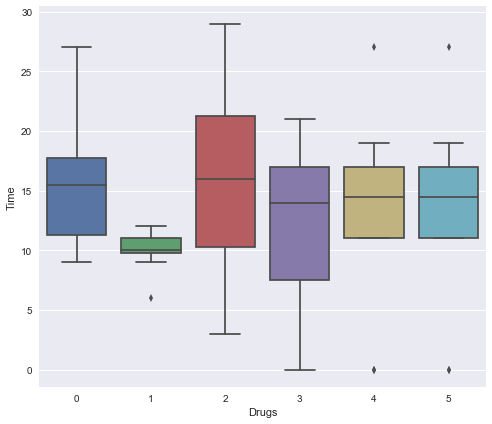

In [141]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=[X12, X22, X32, X42, X52, X62])
plt.xlabel('Drugs')
plt.ylabel('Time')
plt.show()

Проверяем на нормальность

In [144]:
multipletests([sps.shapiro(X12)[1], sps.shapiro(X22)[1], sps.shapiro(X32)[1], sps.shapiro(X42)[1], sps.shapiro(X52)[1], sps.shapiro(X62)[1]], alpha=0.05, method='holm')

(array([False, False, False, False, False, False]),
 array([1.        , 0.73802894, 1.        , 1.        , 1.        ,
        1.        ]),
 0.008512444610847103,
 0.008333333333333333)

На равенство дисперсий

In [146]:
sps.bartlett(*[X12, X22, X32, X42, X52, X62])

BartlettResult(statistic=14.719503929741753, pvalue=0.01163056146599319)

Гипотеза и равенстве дисперсий отвергается. Поэтому критерий Фишера опять не можем использовать. Проверим критерием Краскела-Уоллиса

In [147]:
sps.kruskal(X12, X22, X32, X42, X52, X62)

KruskalResult(statistic=7.169709809391415, pvalue=0.20832165452384038)

В данном случае получили, что различие в эффектах разных лекарств незначимо. То есть можем считать, что господину Цаю без разницы какое лекарство принимать.

## Задача 4

In [149]:
data = np.load('hw7t4.npy')
data.shape

(250, 3)

Посмотрим на значения факторов

In [162]:
np.unique(data[:,0]), np.unique(data[:,1])

(array([0., 1., 2., 3., 4.]), array([0., 1., 2., 3., 4.]))

Сделаем из данных трехмерную таблицу

In [167]:
sample = [[[] for i in range(5)] for i in range(5)]

for i in range(5):
    for j in range(5):
        data_i = data[data[:,0] == i]
        data_i_j = data_i[data_i[:,1] == j][:,2]
        data_i_j
        sample[i][j] = data_i_j
print(np.array(sample).shape)

(5, 5, 10)


Проверим каждую выборку для i-ого и j-ого факторов на нормальность.

In [184]:
pvalues = []
for i in range(5):
    for j in range(5): 
        mean = sample[i][j].mean()
        std = sample[i][j].std()
        
        pvalues.append(sps.kstest(sample[i][j], sps.norm(loc=mean, scale=std).cdf)[1])
multipletests(pvalues, alpha=0.05, method='holm')


(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]),
 0.0020496284126207964,
 0.002)

Видим, что после множественной проверки ни одна из гипотез о нормальности не отвергается. Проверим все выборки на равенство дисперсий

In [205]:
sample = np.array(sample)
sps.bartlett(*np.vstack((sample[0], sample[1], sample[2], sample[3], sample[4])))

BartlettResult(statistic=63.86139765108315, pvalue=1.7853006082480802e-05)

Получили, что гипотеза о том, что дисперсии одинаковы, отвергается. Что плохо для использования единственного критерия двухфакторного анализа, который мы изучили(критерий Фишера). Но другого критерия у нас нет, так что все равно будем применять его.

In [251]:
n = 10.
m, k = 5., 5.
X1 = np.mean(sample, axis=2).mean(axis=1)
X2 = np.mean(sample, axis=2).mean(axis=0)
X12 = np.mean(sample, axis=2)

S1 = (n * m / (k - 1)) * np.sum((X1 - np.mean(sample))**2)
S2 = (n * k / (m - 1)) * np.sum((X2- np.mean(sample))**2)
S12 = n / ((k - 1)*(m - 1)) * np.sum((X12 - X1[:,np.newaxis] - X2[np.newaxis:,] + np.mean(sample))**2)
S_int = 1 / (k * m * (n - 1)) * np.sum((sample - X12[:,:,np.newaxis])**2)

F1 = S1 / S_int
F2 = S2 / S_int
F12 = S12 / S_int

pvalue1 = sps.f.sf(F1, k - 1, k * m * (n - 1))
pvalue2 = sps.f.sf(F2, m - 1, k * m * (n - 1))
pvalue3 = sps.f.sf(F12, (k - 1)*(m - 1), k * m * (n - 1))

print(pvalue1)
print(pvalue2)
print(pvalue3)

0.0015250993253828752
7.391588105092054e-08
0.6466025101739976


In [253]:
multipletests([pvalue1, pvalue2, pvalue3], alpha=0.05, method='holm')

(array([ True,  True, False]),
 array([3.05019865e-03, 2.21747643e-07, 6.46602510e-01]),
 0.016952427508441503,
 0.016666666666666666)

Получили, что гипотезы об отсутвии влияния обоих факторов отвергаются, а гипотеза об отсутствии взаимодействия этих двух факторов не отвергается. То есть влияние обоих факторов на наблюдения является статистически значимым.